https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge/data?select=metadata.csv

https://www.kaggle.com/code/moghazy/covid-19-ir-ranking-system-web-scraping

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("covid19_1210.csv") #veri kümesi içe aktarıldı


In [7]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-10-12 04:22:51,33.93911,67.709953,200626.0,7807.0,NaN,NaN,Afghanistan,515.372592,3.891320
1,NaN,NaN,NaN,Albania,2022-10-12 04:22:51,41.15330,20.168300,332534.0,3590.0,NaN,NaN,Albania,11555.146292,1.079589
2,NaN,NaN,NaN,Algeria,2022-10-12 04:22:51,28.03390,1.659600,270716.0,6881.0,NaN,NaN,Algeria,617.353617,2.541778
3,NaN,NaN,NaN,Andorra,2022-10-12 04:22:51,42.50630,1.521800,46275.0,155.0,NaN,NaN,Andorra,59891.283246,0.334954
4,NaN,NaN,NaN,Angola,2022-10-12 04:22:51,-11.20270,17.873900,103131.0,1917.0,NaN,NaN,Angola,313.789810,1.858801


In [8]:
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-10-12 04:22:51,33.939110,67.709953,200626.0,7807.0,NaN,NaN,Afghanistan,515.372592,3.891320
1,NaN,NaN,NaN,Albania,2022-10-12 04:22:51,41.153300,20.168300,332534.0,3590.0,NaN,NaN,Albania,11555.146292,1.079589
2,NaN,NaN,NaN,Algeria,2022-10-12 04:22:51,28.033900,1.659600,270716.0,6881.0,NaN,NaN,Algeria,617.353617,2.541778
3,NaN,NaN,NaN,Andorra,2022-10-12 04:22:51,42.506300,1.521800,46275.0,155.0,NaN,NaN,Andorra,59891.283246,0.334954
4,NaN,NaN,NaN,Angola,2022-10-12 04:22:51,-11.202700,17.873900,103131.0,1917.0,NaN,NaN,Angola,313.789810,1.858801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,NaN,NaN,NaN,West Bank and Gaza,2022-10-12 04:22:51,31.952200,35.233200,702804.0,5707.0,NaN,NaN,West Bank and Gaza,13776.645543,0.812033
4012,NaN,NaN,NaN,Winter Olympics 2022,2022-10-12 04:22:51,39.904200,116.407400,535.0,0.0,NaN,NaN,Winter Olympics 2022,NaN,0.000000
4013,NaN,NaN,NaN,Yemen,2022-10-12 04:22:51,15.552727,48.516388,11939.0,2158.0,NaN,NaN,Yemen,40.028877,18.075216
4014,NaN,NaN,NaN,Zambia,2022-10-12 04:22:51,-13.133897,27.849332,333624.0,4017.0,NaN,NaN,Zambia,1814.756302,1.204050


In [9]:
df.duplicated() #tekrar eden değerler için bool değer döndürür

0       False
1       False
2       False
3       False
4       False
        ...  
4011    False
4012    False
4013    False
4014    False
4015    False
Length: 4016, dtype: bool

In [10]:
df.drop_duplicates() #tekrar eden değerleri siler

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-10-12 04:22:51,33.939110,67.709953,200626.0,7807.0,NaN,NaN,Afghanistan,515.372592,3.891320
1,NaN,NaN,NaN,Albania,2022-10-12 04:22:51,41.153300,20.168300,332534.0,3590.0,NaN,NaN,Albania,11555.146292,1.079589
2,NaN,NaN,NaN,Algeria,2022-10-12 04:22:51,28.033900,1.659600,270716.0,6881.0,NaN,NaN,Algeria,617.353617,2.541778
3,NaN,NaN,NaN,Andorra,2022-10-12 04:22:51,42.506300,1.521800,46275.0,155.0,NaN,NaN,Andorra,59891.283246,0.334954
4,NaN,NaN,NaN,Angola,2022-10-12 04:22:51,-11.202700,17.873900,103131.0,1917.0,NaN,NaN,Angola,313.789810,1.858801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,NaN,NaN,NaN,West Bank and Gaza,2022-10-12 04:22:51,31.952200,35.233200,702804.0,5707.0,NaN,NaN,West Bank and Gaza,13776.645543,0.812033
4012,NaN,NaN,NaN,Winter Olympics 2022,2022-10-12 04:22:51,39.904200,116.407400,535.0,0.0,NaN,NaN,Winter Olympics 2022,NaN,0.000000
4013,NaN,NaN,NaN,Yemen,2022-10-12 04:22:51,15.552727,48.516388,11939.0,2158.0,NaN,NaN,Yemen,40.028877,18.075216
4014,NaN,NaN,NaN,Zambia,2022-10-12 04:22:51,-13.133897,27.849332,333624.0,4017.0,NaN,NaN,Zambia,1814.756302,1.204050


In [11]:
x=df.isnull()  # verinin var olup olmamasına göre true yada false döner nan ise true döner
print(x)
print(type(x))

      FIPS  Admin2  Province_State  Country_Region  Last_Update    Lat  Long_  \
0     True    True            True           False        False  False  False   
1     True    True            True           False        False  False  False   
2     True    True            True           False        False  False  False   
3     True    True            True           False        False  False  False   
4     True    True            True           False        False  False  False   
...    ...     ...             ...             ...          ...    ...    ...   
4011  True    True            True           False        False  False  False   
4012  True    True            True           False        False  False  False   
4013  True    True            True           False        False  False  False   
4014  True    True            True           False        False  False  False   
4015  True    True            True           False        False  False  False   

      Confirmed  Deaths  Re

In [12]:
y=df.isnull().sum()
print(y)
print(type(y))
print()

FIPS                    177
Admin2                 4016
Province_State         4016
Country_Region         3839
Last_Update            3839
Lat                    3841
Long_                  3841
Confirmed              3839
Deaths                 3839
Recovered              4016
Active                 4016
Combined_Key           3839
Incident_Rate          3844
Case_Fatality_Ratio    3839
dtype: int64
<class 'pandas.core.series.Series'>



In [13]:
z=df.isnull().sum().sum() #toplam nan değerlerini verir
print(z)
print(type(z))
print()

50801
<class 'numpy.int64'>



In [14]:
x=df.notnull()  # isnull ın tam tersi
print(x)
print(type(x))

       FIPS  Admin2  Province_State  Country_Region  Last_Update   Lat  Long_  \
0     False   False           False            True         True  True   True   
1     False   False           False            True         True  True   True   
2     False   False           False            True         True  True   True   
3     False   False           False            True         True  True   True   
4     False   False           False            True         True  True   True   
...     ...     ...             ...             ...          ...   ...    ...   
4011  False   False           False            True         True  True   True   
4012  False   False           False            True         True  True   True   
4013  False   False           False            True         True  True   True   
4014  False   False           False            True         True  True   True   
4015  False   False           False            True         True  True   True   

      Confirmed  Deaths  Re

In [15]:
y=df.notnull().sum()
print(y)
print(type(y))
print()

FIPS                   3839
Admin2                    0
Province_State            0
Country_Region          177
Last_Update             177
Lat                     175
Long_                   175
Confirmed               177
Deaths                  177
Recovered                 0
Active                    0
Combined_Key            177
Incident_Rate           172
Case_Fatality_Ratio     177
dtype: int64
<class 'pandas.core.series.Series'>



In [16]:
z=df.notnull().sum().sum() #toplam nan değerlerini verir
print(z)
print(type(z))
print()

5423
<class 'numpy.int64'>



In [17]:
f=df.dropna() #nan olan satırların tamamını siler
print(f)
print(type(f))
print()

Empty DataFrame
Columns: [FIPS, Admin2, Province_State, Country_Region, Last_Update, Lat, Long_, Confirmed, Deaths, Recovered, Active, Combined_Key, Incident_Rate, Case_Fatality_Ratio]
Index: []
<class 'pandas.core.frame.DataFrame'>



In [18]:
z=df.dropna(how="all") #tüm veriler nan olduğunda sil
print(z)
print(type(z))
print()

     FIPS  Admin2  Province_State        Country_Region          Last_Update  \
0     NaN     NaN             NaN           Afghanistan  2022-10-12 04:22:51   
1     NaN     NaN             NaN               Albania  2022-10-12 04:22:51   
2     NaN     NaN             NaN               Algeria  2022-10-12 04:22:51   
3     NaN     NaN             NaN               Andorra  2022-10-12 04:22:51   
4     NaN     NaN             NaN                Angola  2022-10-12 04:22:51   
...   ...     ...             ...                   ...                  ...   
4011  NaN     NaN             NaN    West Bank and Gaza  2022-10-12 04:22:51   
4012  NaN     NaN             NaN  Winter Olympics 2022  2022-10-12 04:22:51   
4013  NaN     NaN             NaN                 Yemen  2022-10-12 04:22:51   
4014  NaN     NaN             NaN                Zambia  2022-10-12 04:22:51   
4015  NaN     NaN             NaN              Zimbabwe  2022-10-12 04:22:51   

            Lat       Long_  Confirmed 

In [19]:
e=df.dropna(thresh=1) # yalnızca 1 tane nan olanları sil
print(e)
print(type(e))
print()

     FIPS  Admin2  Province_State        Country_Region          Last_Update  \
0     NaN     NaN             NaN           Afghanistan  2022-10-12 04:22:51   
1     NaN     NaN             NaN               Albania  2022-10-12 04:22:51   
2     NaN     NaN             NaN               Algeria  2022-10-12 04:22:51   
3     NaN     NaN             NaN               Andorra  2022-10-12 04:22:51   
4     NaN     NaN             NaN                Angola  2022-10-12 04:22:51   
...   ...     ...             ...                   ...                  ...   
4011  NaN     NaN             NaN    West Bank and Gaza  2022-10-12 04:22:51   
4012  NaN     NaN             NaN  Winter Olympics 2022  2022-10-12 04:22:51   
4013  NaN     NaN             NaN                 Yemen  2022-10-12 04:22:51   
4014  NaN     NaN             NaN                Zambia  2022-10-12 04:22:51   
4015  NaN     NaN             NaN              Zimbabwe  2022-10-12 04:22:51   

            Lat       Long_  Confirmed 

In [20]:
df.info() #her bir sütunda null olmayan girdi sayısı ve sütunun veri tipi gibi bilgileri elde edebiliriz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3839 non-null   object 
 1   Admin2               0 non-null      float64
 2   Province_State       0 non-null      float64
 3   Country_Region       177 non-null    object 
 4   Last_Update          177 non-null    object 
 5   Lat                  175 non-null    float64
 6   Long_                175 non-null    float64
 7   Confirmed            177 non-null    float64
 8   Deaths               177 non-null    float64
 9   Recovered            0 non-null      float64
 10  Active               0 non-null      float64
 11  Combined_Key         177 non-null    object 
 12  Incident_Rate        172 non-null    float64
 13  Case_Fatality_Ratio  177 non-null    float64
dtypes: float64(10), object(4)
memory usage: 439.4+ KB


In [21]:
df.describe() #sayısal verilere sahip olan sütunların max, min , std…gibi istatiksel değerlerini döndürür.

,Admin2,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,0.0,0.0,175.000000,175.000000,1.770000e+02,177.000000,0.0,0.0,172.000000,177.000000
mean,NaN,NaN,17.275852,21.694100,1.219467e+06,11770.627119,NaN,NaN,15027.692930,1.520850
std,NaN,NaN,23.957947,65.236655,3.335249e+06,26783.766273,NaN,NaN,17541.139107,2.308684
min,NaN,NaN,-71.949900,-175.198200,9.000000e+00,0.000000,NaN,NaN,38.894293,0.000000
25%,NaN,NaN,3.525400,-4.771633,2.778200e+04,287.000000,NaN,NaN,803.038577,0.469543
50%,NaN,NaN,15.552727,21.758700,2.062500e+05,2158.000000,NaN,NaN,8085.478274,1.073566
75%,NaN,NaN,38.912350,47.175437,1.006070e+06,9372.000000,NaN,NaN,21952.065924,1.936380
max,NaN,NaN,64.963100,178.065000,3.498687e+07,158235.000000,NaN,NaN,62272.379044,22.222222


In [22]:
df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [23]:
df.shape

(4016, 14)

In [24]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3839 non-null   object 
 1   Admin2               0 non-null      float64
 2   Province_State       0 non-null      float64
 3   Country_Region       177 non-null    object 
 4   Last_Update          177 non-null    object 
 5   Lat                  175 non-null    float64
 6   Long_                175 non-null    float64
 7   Confirmed            177 non-null    float64
 8   Deaths               177 non-null    float64
 9   Recovered            0 non-null      float64
 10  Active               0 non-null      float64
 11  Combined_Key         177 non-null    object 
 12  Incident_Rate        172 non-null    float64
 13  Case_Fatality_Ratio  177 non-null    float64
dtypes: float64(10), object(4)
memory usage: 439.4+ KB


In [25]:
country=df["Country_Region"].value_counts() # Elemeanların kaç adet olduğunu yazdırır.

In [26]:
country

Gabon                  1
Belize                 1
Equatorial Guinea      1
Moldova                1
Congo (Brazzaville)    1
                      ..
Jamaica                1
Guinea                 1
Norway                 1
Cabo Verde             1
North Macedonia        1
Name: Country_Region, Length: 177, dtype: int64

In [27]:
df["Country_Region"].unique() # Tekrar etmeyen değerleri ekrana getirir.

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', nan,
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Holy See', 'Honduras', '

In [28]:
df["Country_Region"].nunique()

177

In [29]:
df.iloc[1:4]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
1,NaN,NaN,NaN,Albania,2022-10-12 04:22:51,41.1533,20.1683,332534.0,3590.0,NaN,NaN,Albania,11555.146292,1.079589
2,NaN,NaN,NaN,Algeria,2022-10-12 04:22:51,28.0339,1.6596,270716.0,6881.0,NaN,NaN,Algeria,617.353617,2.541778
3,NaN,NaN,NaN,Andorra,2022-10-12 04:22:51,42.5063,1.5218,46275.0,155.0,NaN,NaN,Andorra,59891.283246,0.334954


In [30]:
df.loc[df["Country_Region"] == "Turkey"]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
676,NaN,NaN,NaN,Turkey,2022-10-12 04:22:51,38.9637,35.2433,16919638.0,101203.0,NaN,NaN,Turkey,20061.447917,0.598139


In [31]:
import seaborn as sns

In [32]:
countries=df["Country_Region"].unique()

In [33]:
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', nan,
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Holy See', 'Honduras', '

In [34]:
country = df["Country_Region"].value_counts()
num = country.values

In [35]:
num

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [36]:
#result = df.groupby('Country_Region').get_group('').count() 
df.groupby(['Country_Region','Deaths']).groups

{('Afghanistan', 7807.0): [0], ('Albania', 3590.0): [1], ('Algeria', 6881.0): [2], ('Andorra', 155.0): [3], ('Angola', 1917.0): [4], ('Antarctica', 0.0): [5], ('Antigua and Barbuda', 146.0): [6], ('Argentina', 129958.0): [7], ('Armenia', 8700.0): [8], (nan, nan): [9], (nan, nan): [10], (nan, nan): [11], (nan, nan): [12], (nan, nan): [13], (nan, nan): [14], (nan, nan): [15], (nan, nan): [16], ('Austria', 20857.0): [17], ('Azerbaijan', 9931.0): [18], ('Bahamas', 833.0): [19], ('Bahrain', 1521.0): [20], ('Bangladesh', 29386.0): [21], ('Barbados', 560.0): [22], ('Belarus', 7118.0): [23], (nan, nan): [24], (nan, nan): [25], (nan, nan): [26], (nan, nan): [27], (nan, nan): [28], (nan, nan): [29], (nan, nan): [30], (nan, nan): [31], (nan, nan): [32], (nan, nan): [33], (nan, nan): [34], (nan, nan): [35], ('Belize', 686.0): [36], ('Benin', 163.0): [37], ('Bhutan', 21.0): [38], ('Bolivia', 22237.0): [39], ('Bosnia and Herzegovina', 16155.0): [40], ('Botswana', 2790.0): [41], (nan, nan): [42], (na

In [64]:
death_turkey=df.groupby("Country_Region")["Deaths"].get_group('Turkey').sum()

In [66]:
death_turkey

101203.0

In [69]:
death_df=df.groupby("Country_Region")["Deaths"].sum().reset_index()

<AxesSubplot:xlabel='Country_Region'>

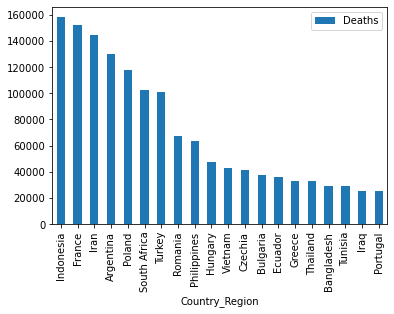

In [72]:
death_df.sort_values("Deaths",ascending=False).head(20).plot(x="Country_Region",y="Deaths",kind="bar")

<AxesSubplot:ylabel='Country_Region'>

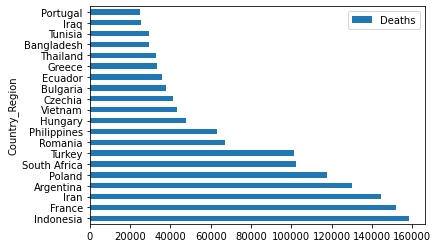

In [73]:
death_df.sort_values("Deaths",ascending=False).head(20).plot(x="Country_Region",y="Deaths",kind="barh")

In [75]:
total_death=df['Deaths'].sum() #toplam ölüm sayısı

In [76]:
total_death

2083401.0

In [77]:
df.corr() #korelasyon

,Admin2,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
Admin2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province_State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,NaN,NaN,1.000000,0.008800,0.176525,0.091914,NaN,NaN,0.461242,-0.064969
Long_,NaN,NaN,0.008800,1.000000,0.049356,0.040296,NaN,NaN,0.034698,-0.071749
Confirmed,NaN,NaN,0.176525,0.049356,1.000000,0.752044,NaN,NaN,0.280177,-0.088495
Deaths,NaN,NaN,0.091914,0.040296,0.752044,1.000000,NaN,NaN,0.086332,0.021459
Recovered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incident_Rate,NaN,NaN,0.461242,0.034698,0.280177,0.086332,NaN,NaN,1.000000,-0.354353
Case_Fatality_Ratio,NaN,NaN,-0.064969,-0.071749,-0.088495,0.021459,NaN,NaN,-0.354353,1.000000


<AxesSubplot:>

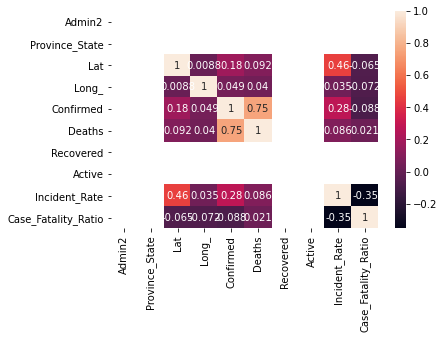

In [78]:
sns.heatmap(df.corr(),annot=True)

In [126]:
max_death=max(df.groupby("Country_Region")["Deaths"].sum() ) #en yüksek ölüm oranını verir

In [127]:
death_df

158235.0

In [142]:
max_death1 = df.groupby("Country_Region")["Deaths"].sum().max()  

In [143]:
max_death

158235.0

In [155]:
max_deathcountry = df.groupby("Deaths").get_group(158235.0)["Country_Region"].reset_index() #ölüm oranı en yüksek olan ülkeyi verir

In [156]:
max_deathcountry

,index,Country_Region
0,287,Indonesia
